## Penguin Visualization

In [1]:
import pandas as pd

mydata = pd.read_csv('penglings.csv')
mydata.head(8)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007


### K-Means imputer for missing values

In [2]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

imputer = KNNImputer(n_neighbors = 3)

# Columns I want to use for imputation
columns_for_impute = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Standardize data so body_mass_g does not overwieght all measures
scaler = StandardScaler()
mydata_standardized = scaler.fit_transform(mydata[columns_for_impute])


mydata_imputed = pd.DataFrame(imputer.fit_transform(mydata_standardized))

# Unstandardize the imputed data
mydata_unstandardized = scaler.inverse_transform(mydata_imputed)

# Replace the original columns in the original DataFrame with the imputed values
mydata[columns_for_impute] = mydata_unstandardized

# Display the DataFrame after imputation
print(mydata.head(8))


C:\Users\14012\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen        39.10000       18.70000   
1           2  Adelie  Torgersen        39.50000       17.40000   
2           3  Adelie  Torgersen        40.30000       18.00000   
3           4  Adelie  Torgersen        43.92193       17.15117   
4           5  Adelie  Torgersen        36.70000       19.30000   
5           6  Adelie  Torgersen        39.30000       20.60000   
6           7  Adelie  Torgersen        38.90000       17.80000   
7           8  Adelie  Torgersen        39.20000       19.60000   

   flipper_length_mm  body_mass_g     sex  year  
0         181.000000  3750.000000    male  2007  
1         186.000000  3800.000000  female  2007  
2         195.000000  3250.000000  female  2007  
3         200.915205  4201.754386     NaN  2007  
4         193.000000  3450.000000  female  2007  
5         190.000000  3650.000000    male  2007  
6         181.000000  3625.000000  female  200

In [3]:
mydata.to_csv('imputed_data.csv', index=False)

In [4]:
import altair as alt

dom = ['Adelie', 'Chinstrap', 'Gentoo']
col = ['Orange', 'Purple', 'Turquoise']

alt.Chart(mydata).mark_point(opacity=.5, filled = True).encode(
    x = alt.X('flipper_length_mm', scale = alt.Scale(domain = [170, 235]), title='Flipper Length (mm)'),
    y = alt.Y('body_mass_g', scale = alt.Scale(domain = [2500, 6500]), title='Body Mass (g)'),
    color = alt.Color('species', scale=alt.Scale(domain=dom, range= col)),
    size = alt.Size('bill_length_mm', scale = alt.Scale(domain = [mydata['bill_length_mm'].min(), mydata['bill_length_mm'].max()], range = [10,100]), title = 'Bill Length (mm)')
)

alt.Chart(...)

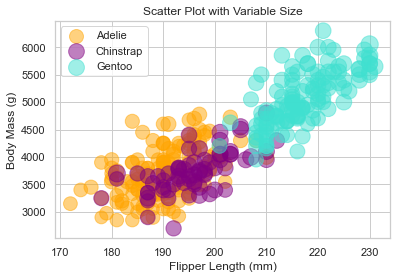

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns  

sns.set(style="whitegrid")

# Specify color mapping for species
species_color_mapping = {'Adelie': 'Orange', 'Chinstrap': 'Purple', 'Gentoo': 'Turquoise'}

for species, color in species_color_mapping.items():
    subset = mydata[mydata['species'] == species]
    plt.scatter(subset['flipper_length_mm'], subset['body_mass_g'], label=species, color=color, alpha=0.5, s=subset['bill_length_mm'] * 2)

# Set axis labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot with Variable Size')

# Set legend
plt.legend()

# Show the plot
plt.show()


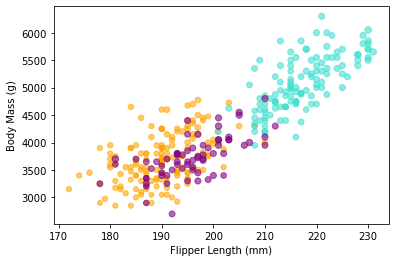

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

species_color_map = {'Adelie': 'Orange', 'Chinstrap': 'Purple', 'Gentoo': 'Turquoise'}

colors = [species_color_map[species] for species in mydata['species']]

norm = Normalize(vmin= mydata['bill_length_mm'].min(), vmax= mydata['bill_length_mm'].max())

plt.scatter(mydata['flipper_length_mm'],mydata['body_mass_g'], c = colors, s=mydata['bill_length_mm'] * .75, norm=norm, alpha = .6)

plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

plt.show()